### Load Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#keseluruhan data
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
#mengetahui jumlah data
df.shape

(4746, 12)

In [4]:
#menghapus beberapa kolom
df1 = df.drop(['Posted On','Floor','Area Locality'],axis=1)
df1.head(5)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


- Penjelasan setiap kolom:
    1. BHK : jumlah Kamar tidur,Aula, Dapur
    2. Rent : Harga Rumah/Apartemen/Rumah susun
    3. Size : Ukuran Rumah/Apartemen/Rumah Susun dalam Kaki Persegi.
    4. Area Type : Ukuran Rumah/Apartemen/Rumah Susun dihitung pada Area Super atau Area Karpet atau Area Bangun.
    5. City: Kota dimana Rumah/Apartemen/Rumah Susun berada.
    6. Furnishing Status: Status Perabotan Rumah/Apartemen/Rumah Susun, baik Furnished atau Semi-Furnished atau Unfurnished.
    7. Tenant Preferred:Jenis Penyewa yang Diutamakan Pemilik atau Agen.
    8. Bathroom: Jumlah Kamar Mandi.
    9. Point of Contact:Siapa yang harus Anda hubungi untuk informasi lebih lanjut mengenai Rumah/Apartemen/Apartemen.



In [5]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
#dapat dilihat data masih ada yang belum menjadi numerik
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   Point of Contact   4746 non-null   object
dtypes: int64(4), object(5)
memory usage: 241.1+ KB


In [6]:
#untuk melihat data yang kosong
df1.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
df1.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


### Exploratory Data Analysis (EDA)

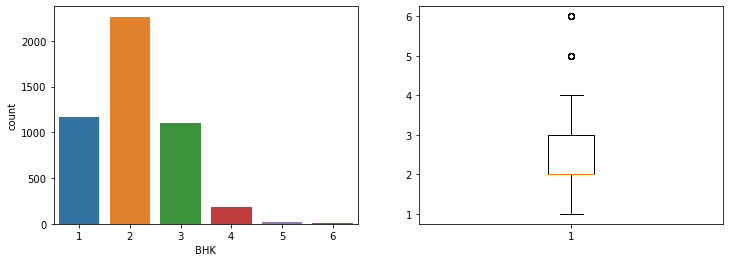

In [8]:
#Univariate analysis BHK
#Melihat distribusi dari BHK
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['BHK'])

f.add_subplot(1,2,2)
plt.boxplot(df['BHK'])
plt.show()

- Dapat dilihat bahwa sebaian besar BHK di angka 2 dan 1
- Data memiliki banyak outliers

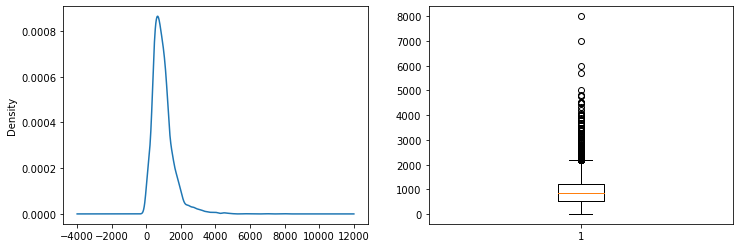

In [9]:
#Univariate analysis Size
#Melihat distribusi dari Size
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Size'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Size'])
plt.show()

- Density dari distribusi ukuran berada di sekitar angka 12000
- Banyak terdapat outliers

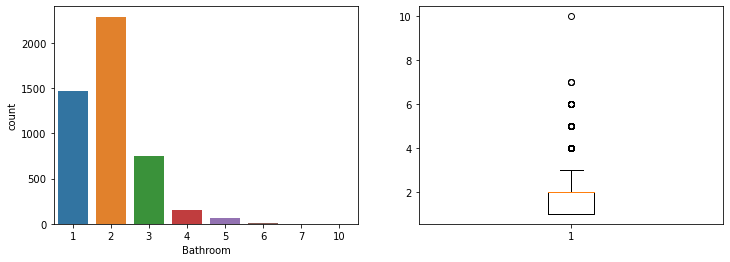

In [10]:
#Univariate analysis bathroom
#Melihat distribusi dari bathroom
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Bathroom'])

f.add_subplot(1,2,2)
plt.boxplot(df['Bathroom'])
plt.show()

- Jumlah kamar madi banyak berada pada angka 1 dan 2
- Nilai outlier sendiri lumayan banyak 

### Prepocessing

In [11]:
df1.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [12]:
#handling city
nominal = pd.get_dummies(df['City'])

In [13]:
#Gabungkan dengan data aslinya.
df_2 = pd.concat([df1, nominal], axis='columns')
df_2

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,0,0,0,1,0
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0,0,0,0,1,0
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0,0,0,0,1,0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0,0,0,0,1,0
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,0,0,0,1,0,0
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,0,0,0,1,0,0
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0,0,0,1,0,0
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0,0,0,1,0,0


In [14]:
#menghapus kolom city yang sudah tida terpakai
df_2.drop(columns='City',inplace=True)

In [15]:
#ubah semua data dari kategorikal menjadi numerik
data=df_2

label_encoders = {}
categorical_columns = data.columns  
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [16]:
data.head()

,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,1,56,334,2,2,1,1,2,0,0,0,0,1,0
1,1,91,223,2,1,1,0,2,0,0,0,0,1,0
2,1,78,302,2,1,1,0,2,0,0,0,0,1,0
3,1,56,223,2,2,1,0,2,0,0,0,0,1,0
4,1,40,243,1,2,0,0,2,0,0,0,0,1,0


Jika data sudah menjadi angka maka data siap untuk di proses selanjutnya

### Modeling menggunakan Linear reggresion

In [17]:
#pertama membuat variable x, y
X = df_2.drop(columns='Rent') #codingan ini semua kolom kecuali kolom Rent
y = df_2['Rent']

In [18]:
#kedua data di split menjadi dua yaitu training and testing dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [19]:
#Cek shape dari data training dan testing
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(3796, 13)
(3796,)

(950, 13)
(950,)


In [20]:
#ketiga membuat objek reggreson
model = LinearRegression()

In [21]:
#Keempat, train the model menggunakan training data yang sudah displit
model.fit(X_train, y_train)

LinearRegression()

In [22]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(model.coef_)
print(model.intercept_)

[ 10.26303922   0.09640745  -0.79495338  -7.38606868  -2.60578416
  10.43170753 -13.06747827  -7.26177844  -9.71286518   4.19834536
 -15.67418854 -21.00394847  49.45443527]
75.51409608380035


In [23]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': X.columns,
    'coef_value':model.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,BHK,10.263039
1,Size,0.096407
2,Area Type,-0.794953
3,Furnishing Status,-7.386069
4,Tenant Preferred,-2.605784
5,Bathroom,10.431708
6,Point of Contact,-13.067478
7,Bangalore,-7.261778
8,Chennai,-9.712865
9,Delhi,4.198345


In [24]:
y_pred = model.predict(X_test)

In [25]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
model.score(X_test, y_test)

0.8118912502348757

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.8118912502348757
MAE score: 17.49464497555626
MSE score: 546.2208573739796


In [27]:
df_2.head(3)

,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,1,56,334,2,2,1,1,2,0,0,0,0,1,0
1,1,91,223,2,1,1,0,2,0,0,0,0,1,0
2,1,78,302,2,1,1,0,2,0,0,0,0,1,0


In [28]:
#Prediksi harga rumah
model.predict([[3,950,3,2,2,5,3,0,0,0,1,0,0]])

array([172.80363938])

### Penjelasan angka-angka predict
- Angka 3   : menjelaskan BHK
- Angka 950 : menjelaskan Size
- Angka 3   : menjelaskan Area Type yaitu built area
- Angka 2   : menjelaskan Furnishing Status yaitu semi-furnished
- Angka 2   : menjelaskan Tenant Prefered yaitu bachelors
- Angka 5   : menjelaskan Bathroom yaitu 5 kamar mandi
- Angka 3   : menjelaskan Point of contact yaitu contact builder
- Angka 0   : menjelaskna bahwa kita tidak memilih city bangalore,chennai,delhi,kolkata mumbai
- Angka 1   : menjelaskan bahwa kita memilih city hyderabad